# What is Corona Virus(COVID-19)?
Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on date 27 March 2020), this leads to a total of 24K+ Deaths across the globe, including 16K+ deaths alone in Europe.Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the india.

# History of COVID-19 in India
On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.No significant rise in cases was seen in the rest of February.

On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi.The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities.Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.

The transmission escalated during March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country.On 4 March, 22 new cases came to light, including those of an Italian tourist group with 14 infected members.But number of cases start increasing dramtically after 19th March, but in the month of April it has been its peak.

Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world.The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.

In [5]:
#Libraries
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

import warnings
warnings.filterwarnings("ignore")
import os

In [14]:
df=pd.read_csv("covid_19_india_dataset.csv")
df.head(1)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan


In [15]:
df=df.drop(['Source_1'],axis=1)
df=df.drop(['Source_2'],axis=1)
df=df.drop(['Source_3'],axis=1)
df=df.drop(['Estimated Onset Date'],axis=1)


In [16]:
df['Date Announced']=pd.to_datetime(df['Date Announced']).dt.strftime('%d-%m-%y')
df['Status Change Date']=pd.to_datetime(df['Status Change Date']).dt.strftime('%d-%m-%y')
df.head(1)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Backup Notes
0,1,KL-TS-P1,30-01-20,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan


In [17]:
df['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated'], dtype=object)

In [18]:
df['Recovered']=0
df.loc[df['Current Status'] == 'Recovered', 'Recovered']= 1 

df['Hospitalized']=0
df.loc[df['Current Status'] == 'Hospitalized', 'Hospitalized']= 1
df.loc[df['Current Status'] == 'Migrated', 'Hospitalized']= 1

df['Death']=0
df.loc[df['Current Status'] == 'Deceased', 'Death']= 1 


In [19]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms_df=pd.DataFrame(data=symptoms)
symptoms_df

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Symptoms'),
 Text(0.5, 1.0, 'Symptoms  of Coronavirus')]

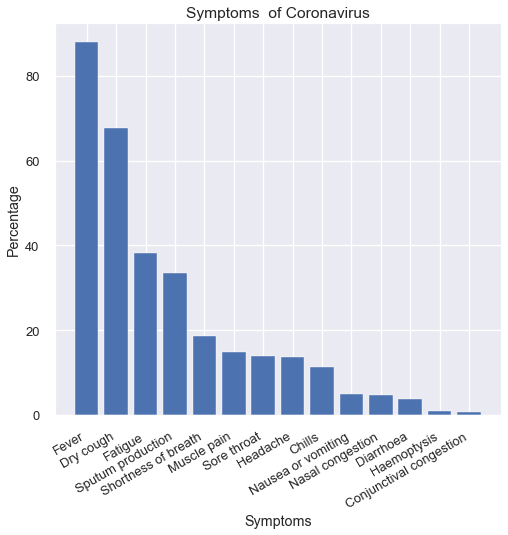

In [20]:
#plotting bar of percentage(y axis) vs symptoms(x axis) 

# Initialize a Figure 
fig= plt.figure(figsize=(8,8))

# Set up Axes
ax = fig.add_subplot(111)     #mean 1,1,1

x=symptoms_df['symptom']
y=symptoms_df['percentage']

ax.bar(x,y)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

#Add titile and label for axes
ax.set(title="Symptoms  of Coronavirus",ylabel='Percentage',xlabel='Symptoms')

In [21]:
print(len(df.loc[df['Recovered']==1]))
print(len(df.loc[df['Hospitalized']==1]))
print(len(df.loc[df['Death']==1]))

181
17080
45


Text(0.5, 1.0, 'Current situation in India')

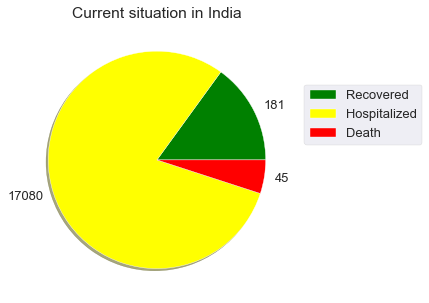

In [22]:
#Plot a pie chart which will show the following cases : ACtive , Death , Recoeverd.

fig=plt.figure()
ax=fig.add_subplot(111)


# Data to plot

labels =[181,17080,45]
sizes = [15,80,5]
colors = ['green','yellow','red']
#plot
ax.pie(sizes,labels=labels,colors=colors,startangle=0,shadow=True)

legendlabel=['Recovered','Hospitalized','Death']

plt.legend(legendlabel,loc='upper right', bbox_to_anchor=(1.5, 0.8))
plt.title("Current situation in India")
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [23]:
df.head(2)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Backup Notes,Recovered,Hospitalized,Death
0,1,KL-TS-P1,30-01-20,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan,1,0,0
1,2,KL-AL-P1,02-02-20,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan,1,0,0


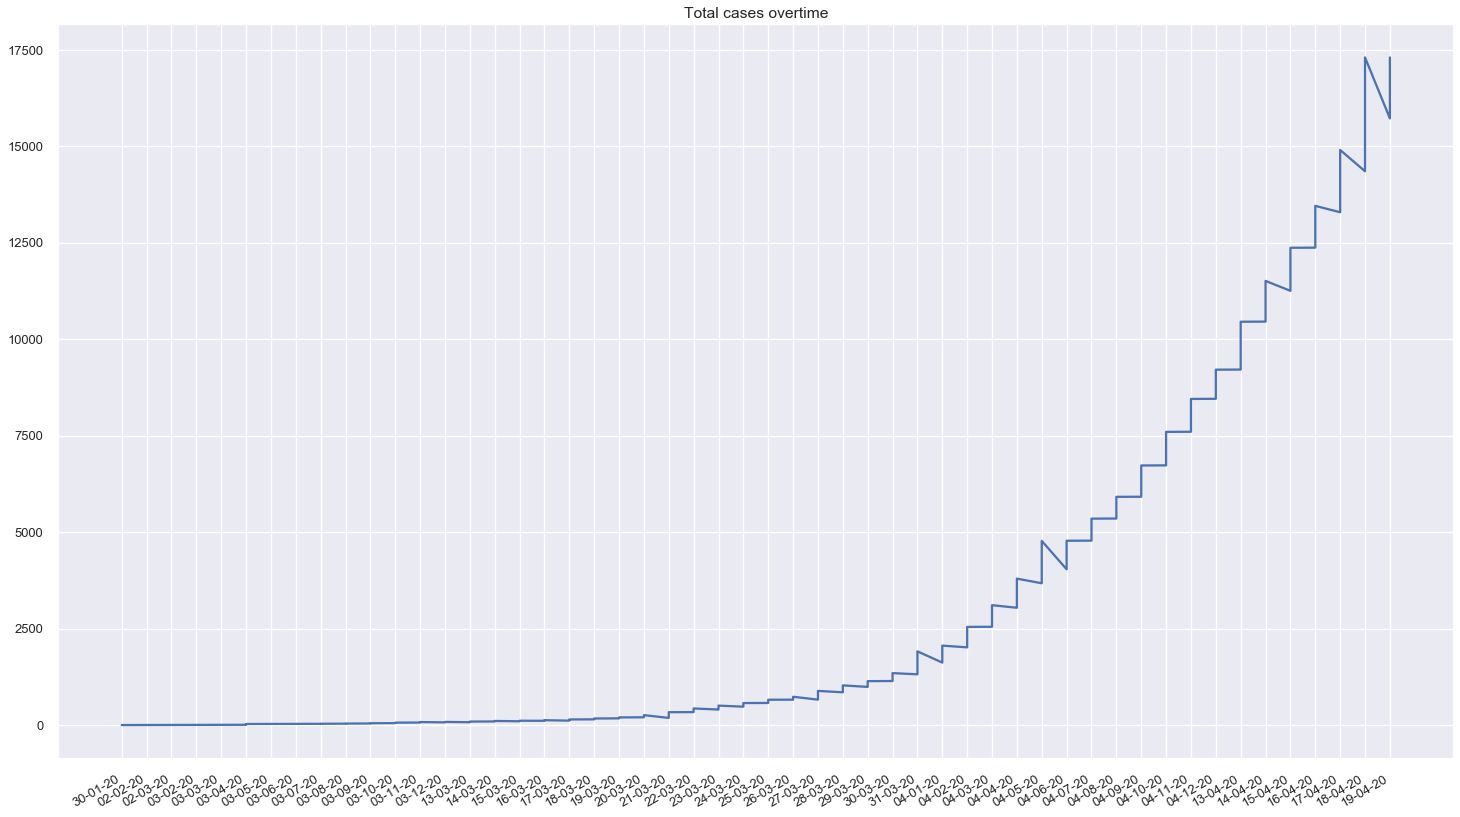

In [24]:
#plot a line diagrame which will show x axis=Date , y axis= No of cases

fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(111)
fig.autofmt_xdate()
plt.title("Total cases overtime")

x=df['Date Announced']
y=df['Patient Number']

ax.plot(x,y)

In [25]:
print(df['Gender'].unique())
total_cases=len(df)
print(total_cases)
male_cases=len(df.loc[df['Gender']=='M'])
print(male_cases)
female_cases=len(df.loc[df['Gender']=='F'])
print(female_cases)
unknown_cases=total_cases-(female_cases+male_cases)
print(unknown_cases)
#print(len(df.loc[df['Gender']!='M']) and df.loc[df['Gender']!='F'])

['F' nan 'M']
17306
2523
1223
13560


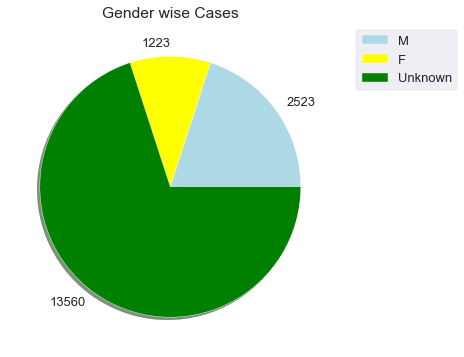

In [26]:
#Gender wise cases pie chart
#x axis=m/f
#y axis= patient number 

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
plt.title('Gender wise Cases')

labels=[male_cases,female_cases,unknown_cases]
size=[20,10,70]
colors=['lightblue','yellow','green']

plt.pie(size,colors=colors,labels=labels,shadow=True)

legendlabel=['M','F','Unknown']
plt.legend(legendlabel,loc='upper right', bbox_to_anchor=(1.4, 1.0))


In [27]:
temp=df.copy()
temp.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Backup Notes,Recovered,Hospitalized,Death
0,1,KL-TS-P1,30-01-20,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan,1,0,0
1,2,KL-AL-P1,02-02-20,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan,1,0,0
2,3,KL-KS-P1,02-03-20,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14-02-20,Student from Wuhan,1,0,0
3,4,DL-P1,03-02-20,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15-03-20,Travel history to Italy and Austria,1,0,0
4,5,TS-P1,03-02-20,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,03-02-20,"Travel history to Dubai, Singapore contact",1,0,0


In [ ]:
#COVID cases recovery,death,active:
#x=date

fig=plt.figure(figsize=(27,10))
ax=fig.add_subplot(111)
plt.title('Covid-19 cases Confirmed,Recovery,Death')
fig.autofmt_xdate()

x=temp['Date Announced']
y=temp['Patient Number']

ax.bar(x,y)


In [ ]:
temp['Hospitalized'].cumsum()